# Supervised Learning Regression Checkpoint

## 5G-Energy consumption

In this checkpoint, I am going to work on the '5G-Energy consumption' dataset that was provided by the  international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

**Checkpoint problematic :**
Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.

**Dataset description :**
This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

**Steps to follow**
- Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
- Select your target variable and the features
- Split your dataset to training and test sets
- Based on your data exploration phase select a ML regression algorithm and train it on the training set
- Assess your model performance on the test set using relevant evaluation metrics
- Discuss with your cohort alternative ways to improve your model performance

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Importing the dataset

In [2]:
df = pd.read_csv(r"C:\Users\damil\Downloads\5G_energy_consumption_dataset.csv")

#### Data cleaning and preprocessing

##### Data overview

In [3]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


##### Summary statistics

In [4]:
df.describe(include = 'all')

,Time,BS,Energy,load,ESMODE,TXpower
count,92629,92629,92629.000000,92629.000000,92629.000000,92629.000000
unique,168,923,NaN,NaN,NaN,NaN
top,20230102 230000,B_583,NaN,NaN,NaN,NaN
freq,766,130,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.138997,0.244705,0.081361,6.765427
std,NaN,NaN,13.934645,0.234677,0.382317,0.309929
min,NaN,NaN,0.747384,0.000000,0.000000,5.381166
25%,NaN,NaN,18.236173,0.057370,0.000000,6.427504
50%,NaN,NaN,24.065770,0.165550,0.000000,6.875934
75%,NaN,NaN,35.724963,0.363766,0.000000,6.875934


##### More information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


##### Checking for missing values

In [6]:
df.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

From above we can see that the dataset does not contain any missing values

##### Checking for duplicates

In [7]:
df.duplicated().sum()

0

The dataset does not contain any duplicates

#### Converting the Time column to datetime

In [8]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')

In [9]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719


In [11]:
# Extract year, month, day, hour, minute and second
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day

df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second 

In [12]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower,Year,Month,Day,Hour,Minute,Second
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719,2023,1,1,1,0,0
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719,2023,1,1,2,0,0
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719,2023,1,1,3,0,0
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719,2023,1,1,4,0,0
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719,2023,1,1,5,0,0


#### Encoding categorical features

In [13]:
df['BS'].value_counts()

BS
B_583     130
B_261     128
B_728     128
B_669     128
B_512     126
         ... 
B_1018     16
B_921      14
B_905      13
B_854       1
B_835       1
Name: count, Length: 923, dtype: int64

In [14]:
df['BS'].unique()

array(['B_0', 'B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8',
       'B_9', 'B_10', 'B_11', 'B_12', 'B_14', 'B_15', 'B_16', 'B_17',
       'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25',
       'B_26', 'B_27', 'B_28', 'B_29', 'B_30', 'B_31', 'B_32', 'B_33',
       'B_34', 'B_35', 'B_36', 'B_37', 'B_38', 'B_39', 'B_40', 'B_41',
       'B_42', 'B_43', 'B_44', 'B_45', 'B_46', 'B_47', 'B_48', 'B_49',
       'B_50', 'B_51', 'B_52', 'B_53', 'B_54', 'B_55', 'B_56', 'B_57',
       'B_58', 'B_59', 'B_60', 'B_61', 'B_62', 'B_63', 'B_64', 'B_65',
       'B_66', 'B_67', 'B_68', 'B_69', 'B_70', 'B_71', 'B_72', 'B_73',
       'B_74', 'B_75', 'B_76', 'B_77', 'B_78', 'B_79', 'B_80', 'B_81',
       'B_82', 'B_83', 'B_84', 'B_85', 'B_86', 'B_87', 'B_88', 'B_89',
       'B_90', 'B_91', 'B_92', 'B_93', 'B_94', 'B_95', 'B_96', 'B_97',
       'B_98', 'B_99', 'B_100', 'B_101', 'B_102', 'B_103', 'B_104',
       'B_105', 'B_106', 'B_107', 'B_108', 'B_109', 'B_110', 'B_111',
       'B_11

#### We can see that BS has too many unique values using Target Encoding replaces each category with the mean of the target variable (Energy) for that category. This method allows the model to learn patterns related to the base station identifiers without creating a large number of features.

In [15]:
# Target Encoding
encoder = ce.TargetEncoder(cols=['BS'])
df['BS_encoded'] = encoder.fit_transform(df['BS'], df['Energy'])

In [16]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower,Year,Month,Day,Hour,Minute,Second,BS_encoded
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719,2023,1,1,1,0,0,73.087415
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719,2023,1,1,2,0,0,73.087415
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719,2023,1,1,3,0,0,73.087415
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719,2023,1,1,4,0,0,73.087415
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719,2023,1,1,5,0,0,73.087415


#### Creating a correlation matrix to indicate the strength and direction of the linear relationships between the different features in the dataset, especially between Energy consumed and other features

In [17]:
selected_columns = ['Energy', 'load', 'ESMODE','TXpower', 'BS_encoded', 'Time', 'Day','Hour']

correlation_matrix = df[selected_columns].corr()

In [18]:
correlation_matrix

,Energy,load,ESMODE,TXpower,BS_encoded,Time,Day,Hour
Energy,1.000000,0.643022,-0.271783,0.450760,0.922452,0.030404,-0.001294,0.203709
load,0.643022,1.000000,-0.208473,0.200221,0.487335,0.066937,0.016688,0.323958
ESMODE,-0.271783,-0.208473,1.000000,0.060017,-0.142792,-0.032436,0.004096,-0.234626
TXpower,0.450760,0.200221,0.060017,1.000000,0.491489,-0.038777,-0.039210,0.000630
BS_encoded,0.922452,0.487335,-0.142792,0.491489,1.000000,0.007711,0.007395,0.002438
Time,0.030404,0.066937,-0.032436,-0.038777,0.007711,1.000000,0.987834,0.132592
Day,-0.001294,0.016688,0.004096,-0.039210,0.007395,0.987834,1.000000,-0.023159
Hour,0.203709,0.323958,-0.234626,0.000630,0.002438,0.132592,-0.023159,1.000000


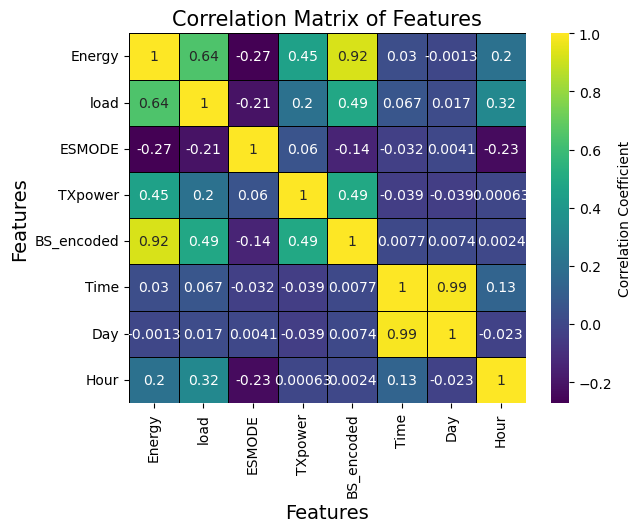

In [19]:
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='viridis',           
            linewidths=0.5,           
            linecolor='black',        
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Features', fontsize=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()

**Energy vs. Other Features:**

- **Energy and BS_encoded:** The correlation coefficient remains 0.922, indicating a very strong positive correlation. This reinforces that BS_encoded is a crucial feature for predicting energy consumption.

- **Energy and load:** The correlation remains 0.643, a moderate positive correlation. This suggests that the traffic load continues to be an important predictor of energy consumption.

- **Energy and ESMODE:** The correlation remains -0.272, a weak negative correlation, indicating that energy-saving modes slightly reduce energy consumption.

- **Energy and TXpower:** The correlation is 0.451, indicating a moderate positive correlation. This suggests that transmission power (TXpower) has a direct impact on energy consumption, which makes sense since higher transmission power generally requires more energy.

- **Energy and Time:** The correlation is 0.030, still very weak. Time itself does not have a strong linear relationship with energy consumption.

- **Energy and Day:** The correlation is -0.001, indicating almost no relationship between Day and energy consumption.

- **Energy and Hour:** The correlation is 0.204, indicating a weak positive correlation. This suggests that the hour of the day has a slight impact on energy consumption, possibly due to varying traffic patterns throughout the day.


#### Selecting my Target Variable and Features

***Summary of Selected Features:***
- **BS_encoded:** Strong predictor.
- **load:** Important predictor.
- **Hour:** Captures daily patterns.
- **ESMODE:** Adds information about energy-saving features.
- **TXpower:** Influences energy consumption.

#### Splitting the Dataset into Training and Test Sets

In [20]:
#dropping unnecessary columns
X = df.drop(columns=['Energy', 'BS', 'Year', 'Month', 'Day', 'Time', 'Minute', 'Second']) 

# Target variable remains the same
y = df['Energy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifying the features
print(X_train.columns)

Index(['load', 'ESMODE', 'TXpower', 'Hour', 'BS_encoded'], dtype='object')


#### Selecting a ML Regression Algorithm and Training It to see which gives the best result

In [21]:
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R² Score:", r2_score(y_test, y_pred_linear))

Linear Regression:
MAE: 2.7504842567919368
MSE: 14.976882793435548
R² Score: 0.9210938363967964


In [22]:
from xgboost import XGBRegressor


# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost Regression:
MAE: 1.5511971272413154
MSE: 5.544545697940161
R² Score: 0.9707883919517042


In [23]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R² Score:", r2_score(y_test, y_pred_tree))


Decision Tree Regression:
MAE: 1.7447697766014387
MSE: 8.197822268440413
R² Score: 0.9568095234485599


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R² Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Regression:
MAE: 1.970588763756416
MSE: 8.224305651841785
R² Score: 0.9566699949357007


##### XGBoost Regression has the best performance in terms of all metrics (lowest MAE, MSE, and highest R² score), indicating that it is the most accurate model among those tested.

#### Initialize and train the model

In [25]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### Make predictions

In [26]:
y_pred_xgb = xgb_model.predict(X_test)

#### Evaluate the model

In [27]:
print("XGBoost Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost Regression:
MAE: 1.5511971272413154
MSE: 5.544545697940161
R² Score: 0.9707883919517042
